# Prática Independente - Scikit Learn.

### Vamos usar o `dataset` `"penguins.csv"` em anexo para estudar algumas características desses animais.

#### o dataset consiste de 7 colunas.

- species: penguin species (Chinstrap, Adélie, or Gentoo)
- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
- sex: penguin sex

### O que são comprimento e profundidade de culmen?

#### O culmen é "o cume superior do bico de um pássaro"

### O que são "flippers"?

#### As asas dos pinguins são chamadas de nadadeiras. São planas, finas e largas, com uma forma longa e cônica e uma ponta arredondada e sem corte

In [30]:
import seaborn as sns
import pandas as pd 

#### Exercício 1: Carregue o dataset `penguins.csv` em um `dataframe`, estude seus atributos e calcule uma matriz de correlação entre os mesmos. Plot a relação `'culmen_length_mm'` `'body_mass_g'` separando a dispersão pelas espécies. Por fim, apresente o `pairplot` de todos os atributos.

o dataset consiste de 7 colunas.

- species: penguin species (Chinstrap, Adélie, or Gentoo)
- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
- sex: penguin sex

### O que são comprimento e profundidade de culmen?

#### O culmen é "o cume superior do bico de um pássaro"

### O que são "flippers"?

#### As asas dos pinguins são chamadas de nadadeiras. São planas, finas e largas, com uma forma longa e cônica e uma ponta arredondada e sem corte

In [31]:
#penguins = sns.load_dataset('penguins')
penguins = pd.read_csv('penguins.csv')
penguins

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,NaN,NaN,NaN,NaN,NaN
4,Adelie,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...
339,Gentoo,NaN,NaN,NaN,NaN,NaN
340,Gentoo,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,45.2,14.8,212.0,5200.0,FEMALE


In [32]:
penguins = penguins.fillna(penguins.mean())

In [33]:
#penguins2 = penguins.drop(['island'], axis = 1)
#penguins2
#penguins2.to_csv('penguins.csv', index = False)

In [34]:
# verificando o final do DataFrame
penguins.tail()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,43.92193,17.15117,200.915205,4201.754386,NaN
340,Gentoo,46.80000,14.30000,215.000000,4850.000000,FEMALE
341,Gentoo,50.40000,15.70000,222.000000,5750.000000,MALE
342,Gentoo,45.20000,14.80000,212.000000,5200.000000,FEMALE
343,Gentoo,49.90000,16.10000,213.000000,5400.000000,MALE


In [35]:
# contando os valores de indicência de cada espécie de flor
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [36]:
# calculando uma matriz de correlação
penguins.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


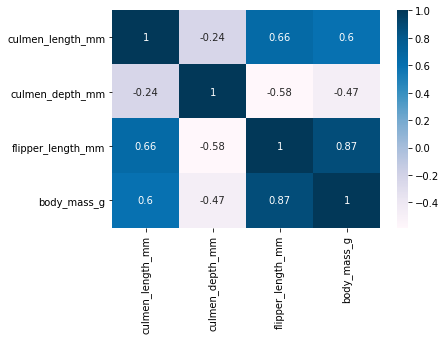

In [37]:
# calculate the correlation matrix
corr = penguins.corr()

# plot the heatmap
sns.heatmap(corr, 
            annot = True, 
            cmap = 'PuBu', 
            xticklabels = corr.columns, 
            yticklabels = corr.columns
           )

In [38]:
#iris.head()
penguins.head()
#penguins['species'].unique()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,36.70000,19.30000,193.000000,3450.000000,FEMALE


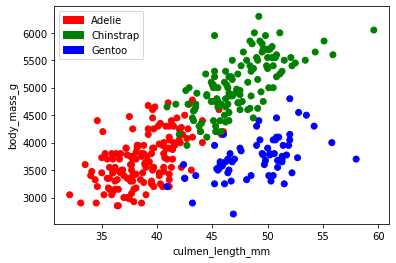

In [39]:
# plotando o gráfico de dispersão do sepal_length pelo petal_width 
# diferenciação visual das classes por espeçie
import matplotlib.pyplot as plt
# Dispersão
fig, ax = plt.subplots()
colors = {'Adelie':'red', 'Chinstrap':'blue', 'Gentoo':'green'}

ax.scatter(penguins['culmen_length_mm'],
           penguins['body_mass_g'],
           c = penguins['species'].apply(lambda x: colors[x])
          )

# Etiquetas
ax.set_xlabel('culmen_length_mm')
ax.set_ylabel('body_mass_g')

# Legenda
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color = 'red', label = 'Adelie')
green_patch = mpatches.Patch(color = 'green', label = 'Chinstrap')
blue_patch = mpatches.Patch(color = 'blue', label = 'Gentoo')
plt.legend(handles=[red_patch, green_patch, blue_patch])

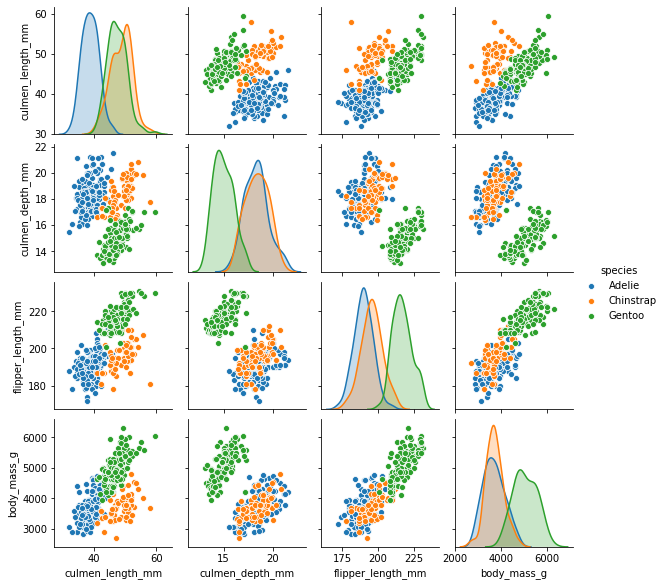

In [40]:
#### plotando um pariplot para visualização dos dados de todas as colunas por espécie
sns.pairplot(penguins, hue = "species", height = 2);

#### Exerício 2: Aproveitando-se do modelo `Naive-Bayes`,  faça uso do modelo [`sklearn.naive_bayes.GaussianNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) para predizer a espécie dos penguins. Realize todos os processos, passo a passo, da escolha do modelo e seu estanciamento, até os ajustes e a previsão. Como sugestão de simplificação você pode eliminar a coluna `'sex'`.  Ao final, faça o teste de acurácia de seu modelo.

In [41]:
# definindo os dados de entrada
#penguins
X_penguins = penguins.drop(['species', 'sex'], axis = 1)
X_penguins.shape
X_penguins


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000
...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386
340,46.80000,14.30000,215.000000,4850.000000
341,50.40000,15.70000,222.000000,5750.000000
342,45.20000,14.80000,212.000000,5200.000000


In [42]:
# definindo a variável target
y_penguins = penguins['species']
y_penguins.shape

(344,)

In [43]:
# Fazendo a modelagem utilizando o Nayve Bayes Gaussaino

from sklearn.naive_bayes import GaussianNB  # 0. escolher a classe de modelo
model = GaussianNB()                        # 1. instanciar o modelo
model.fit(X_penguins, y_penguins)                   # 2. ajustar o modelo aos dados
yhat = model.predict(X_penguins)                # 3. prever
yhat

array(['Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Ad

In [44]:
# construção de um código que compara os valores preditos com os valores reais
# métrica do modelo no método raiz

comparativo = list(zip(list(y_penguins), list(yhat)))

acertos = 0
erros = 0

for row in comparativo:
    if row[0] == row[1]:
        acertos += 1
    else:
        erros += 1
        
print(f'''Acertos: {acertos},
Erros: {erros},
Taxa: {acertos/(acertos + erros)}''')

Acertos: 332,
Erros: 12,
Taxa: 0.9651162790697675


In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_penguins, yhat)

0.9651162790697675

#### Exercício 3: Aplique o método de  [Principal Component Analysis](https://towardsdatascience.com/principal-component-analysis-pca-from-scratch-in-python-7f3e2a540c51), com o auxílio do modelo [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) para realziar a redução de dimensionalidade do dataset penguins. Siga todos os passos, da seleção e instanciamento do modelo aos ajustes e transformação. Plote as componentes principais como reflexo das espécies dos pinguins.

In [46]:
from sklearn.decomposition import PCA  

In [47]:
model = PCA(n_components = 2)

In [48]:
X_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000
...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386
340,46.80000,14.30000,215.000000,4850.000000
341,50.40000,15.70000,222.000000,5750.000000
342,45.20000,14.80000,212.000000,5200.000000


In [49]:
model.fit(X_penguins)

PCA(n_components=2)

In [50]:
X_2D = model.transform(X_penguins)

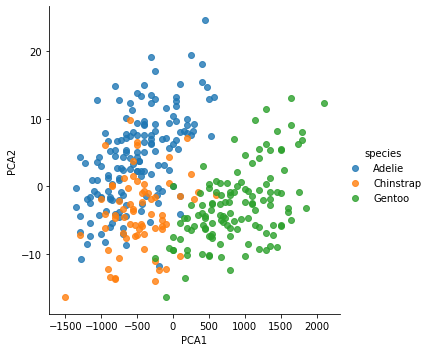

In [51]:
penguins['PCA1'] = X_2D[:, 0]
penguins['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", 
           "PCA2", 
           hue = 'species', 
           data = penguins, 
           fit_reg = False
          );

#### Exercício 4: Considerando a clusterização, observe o método [Gaussian Mixture Model](https://scikit-learn.org/stable/modules/mixture.html#:~:text=sklearn.,of%20components%20are%20also%20provided.) e, tirando vantagem do modelo do modelo [`sklearn.mixture.GaussianMixture`](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html), faça a separação das espécies dos pinguins.

In [52]:
from sklearn.mixture import GaussianMixture

In [53]:
model = GaussianMixture(n_components = 3, covariance_type = 'full')

In [54]:
model.fit(X_penguins)

GaussianMixture(n_components=3)

In [55]:
X_penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.10000,18.70000,181.000000,3750.000000
1,39.50000,17.40000,186.000000,3800.000000
2,40.30000,18.00000,195.000000,3250.000000
3,43.92193,17.15117,200.915205,4201.754386
4,36.70000,19.30000,193.000000,3450.000000


In [56]:
y_gmm = model.predict(X_penguins)
y_gmm

array([2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [57]:
penguins = penguins.drop('sex', axis = 1)
penguins.head()

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,PCA1,PCA2
0,Adelie,39.10000,18.70000,181.000000,3750.000000,-4.520232e+02,1.333664e+01
1,Adelie,39.50000,17.40000,186.000000,3800.000000,-4.019500e+02,9.152694e+00
2,Adelie,40.30000,18.00000,195.000000,3250.000000,-9.517409e+02,-8.261476e+00
3,Adelie,43.92193,17.15117,200.915205,4201.754386,2.465764e-17,-1.870629e-15
4,Adelie,36.70000,19.30000,193.000000,3450.000000,-7.518127e+02,-1.975922e+00


IndexError: invalid index to scalar variable.

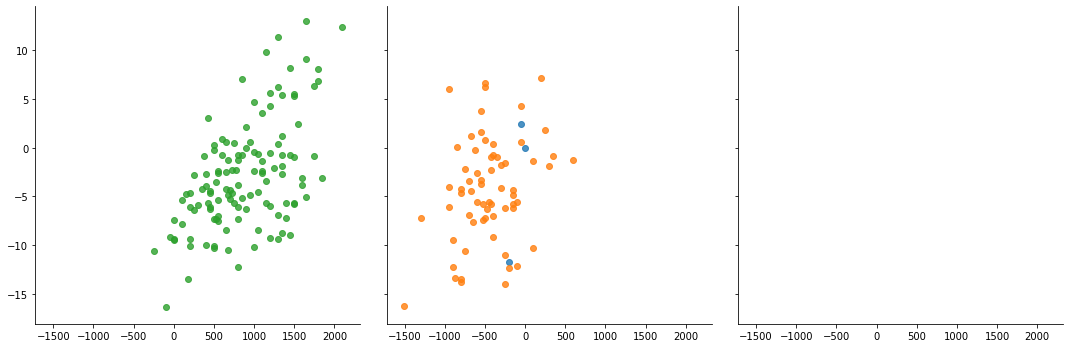

In [58]:
penguins['cluster'] = y_gmm
sns.lmplot("PCA1", 
           "PCA2", 
           data = penguins, 
           hue = 'species', 
           col = 'cluster', 
           fit_reg = False
          );

In [ ]:
penguins.head()

In [ ]:
penguins.groupby("cluster").count()